In [1]:
from definitions import *
from plots import *
from Experiment import *
%load_ext autoreload
%autoreload 2

In [7]:
exp_wind = ClusteringExperiment(
    'ERA5', 'Wind', '300', None, None, -90, 30, 20, 80, 
    'anomaly', 'JJA', 'doy', {'dayofyear': ('win', 30)}, 
    {'detrended': False, 'time': ('win', 10)}, inner_norm=None
)
# exp_u = exp_wind.other('Wind', 'Low', 'u')
exp_z = exp_wind.other('Geopotential', '500')

/storage/homefs/hb22g102/mambaforge/envs/env11/lib/python3.11/site-packages/xarray/core/indexing.py:1372: PerformanceWarning: Slicing with an out-of-order index is generating 63 times more chunks
  return self.array[key]


In [8]:
exp_T = ClusteringExperiment(
    'ERA5', 'Temperature', '2m', 'box_-25_60_32_72', 't', 
    None, None, None, None, 'anomaly', 'JJA', 'doy', 
    {'dayofyear': ('win', 30)}, 
    {'detrended': False, 'time': ('fft', 10)}, 
    inner_norm=None
)
exp_tp = exp_T.other('Precipitation', 'surf')
da_wind = exp_wind.open_da('anomaly', 'JJA')
da_wind_abs = exp_wind.open_da(season='JJA')
da_T = exp_T.open_da('anomaly', 'JJA')
da_z = exp_z.open_da('anomaly', 'JJA')
da_tp = exp_tp.open_da('anomaly', 'JJA')
da_tp = da_tp.drop_duplicates(dim='time').interp(time=da_wind.time)

In [20]:
centers_wind, labels_wind, _ = exp_wind.cluster(4, 8, return_type=6)
centers_z, labels_z, _ = exp_z.cluster(4, 9, return_type=6)

/storage/homefs/hb22g102/mambaforge/envs/env11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


False False True


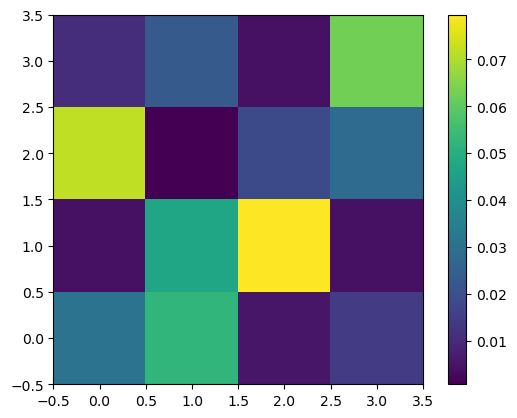

In [10]:
mask_wind = label_to_mask(labels_wind)
mask_z = label_to_mask(labels_z)
mask2D = np.mean(mask_wind[:, 1:, None] & mask_z[:, None, 1:], axis=0)
im = plt.imshow(mask2D, origin='lower')
plt.colorbar(im)

In [11]:
exp_jli = Experiment('ERA5', 'Wind', 'Low', None, 'u', -60, 0, 15, 75, 'none', None, {'time': ('win', 9)})
da_jli = exp_jli.open_da(season='JJA')
da_zm = da_jli.mean(dim='lon')
LatI = da_zm.argmax(dim='lat', skipna=True)
Lat = xr.DataArray(
    da_zm.lat[LatI.values.flatten()].values, coords={"time": da_zm.time}
).rename("Lat")
Int = da_zm.isel(lat=LatI).reset_coords("lat", drop=True).rename("Int")

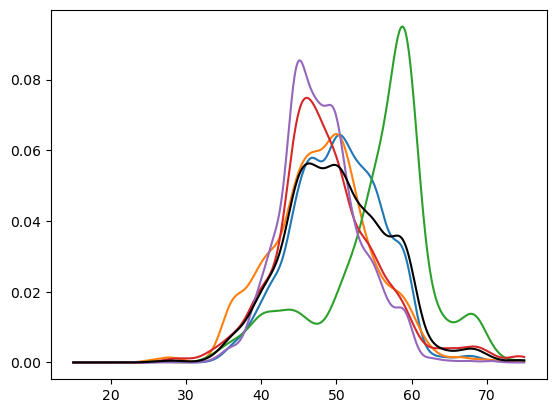

In [14]:
for mas in mask_z.T:
    x, y = kde(Lat[mas], None, np.arange(15, 75.1, .1), scaled=False, return_x=True, bw_method=0.2)
    plt.plot(x, y)
x, y = kde(Lat, None, np.arange(15, 75.1, .1), scaled=False, return_x=True, bw_method=0.2)
plt.plot(x, y, color='black')

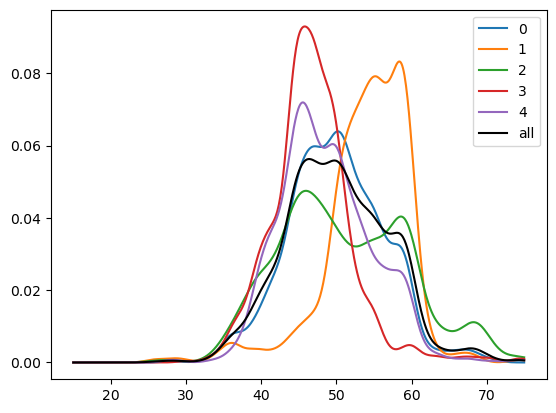

In [13]:
for i, mas in enumerate(mask_wind.T):
    x, y = kde(Lat[mas], None, np.arange(15, 75.1, .1), scaled=False, return_x=True, bw_method=0.2)
    plt.plot(x, y, label=i)
x, y = kde(Lat, None, np.arange(15, 75.1, .1), scaled=False, return_x=True, bw_method=0.2)
plt.plot(x, y, color='black', label='all')
plt.legend()

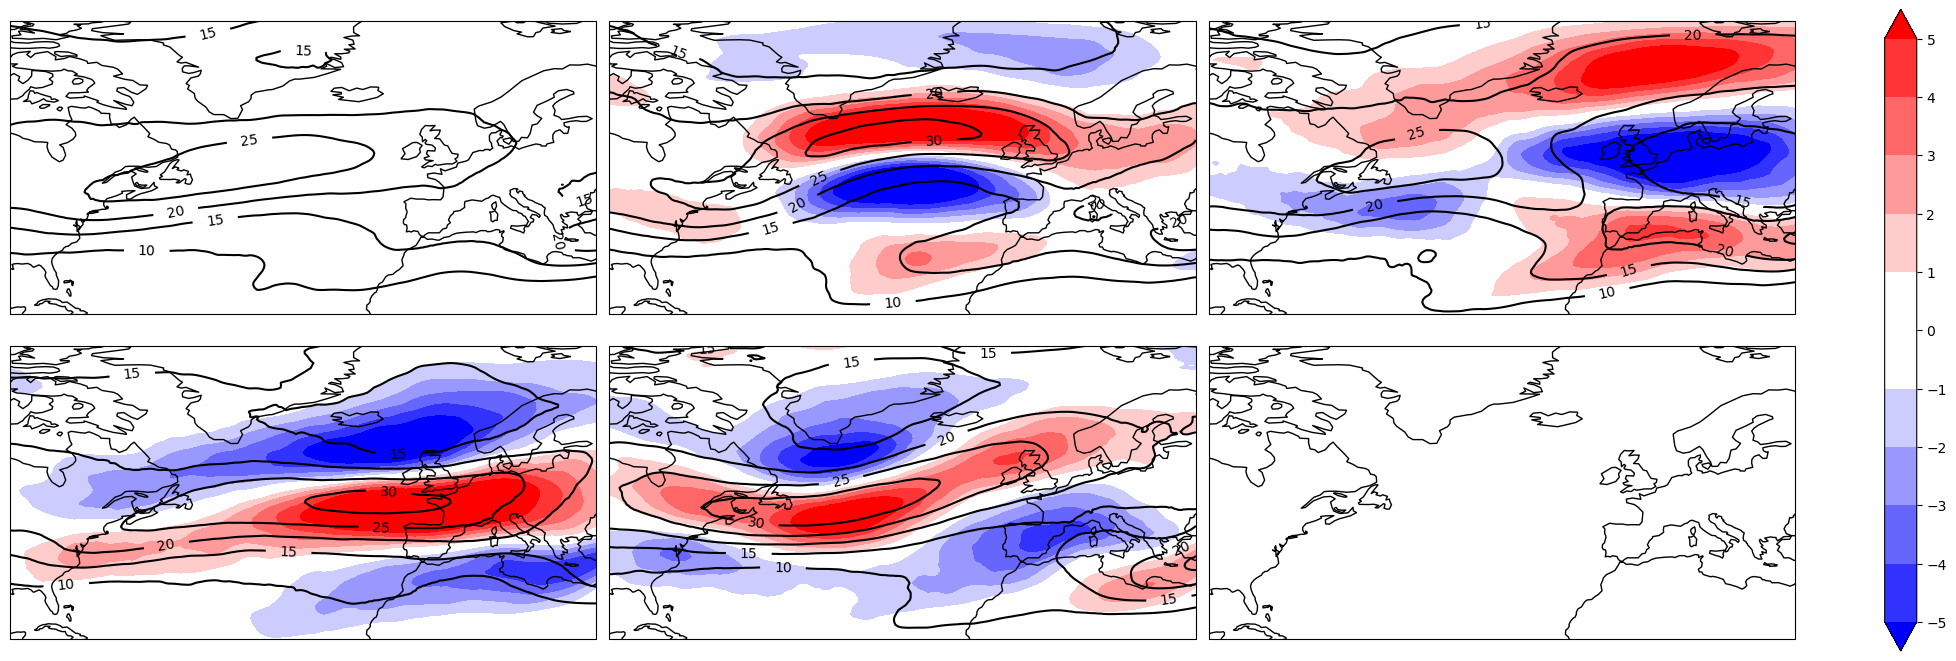

In [18]:
clu = Clusterplot(2, 3, exp_wind.get_region())
clu.add_any_contour_from_mask(da_wind, mask_wind, type='contourf')
clu.add_any_contour_from_mask(da_wind_abs, mask_wind, type='contour', clabels=True)

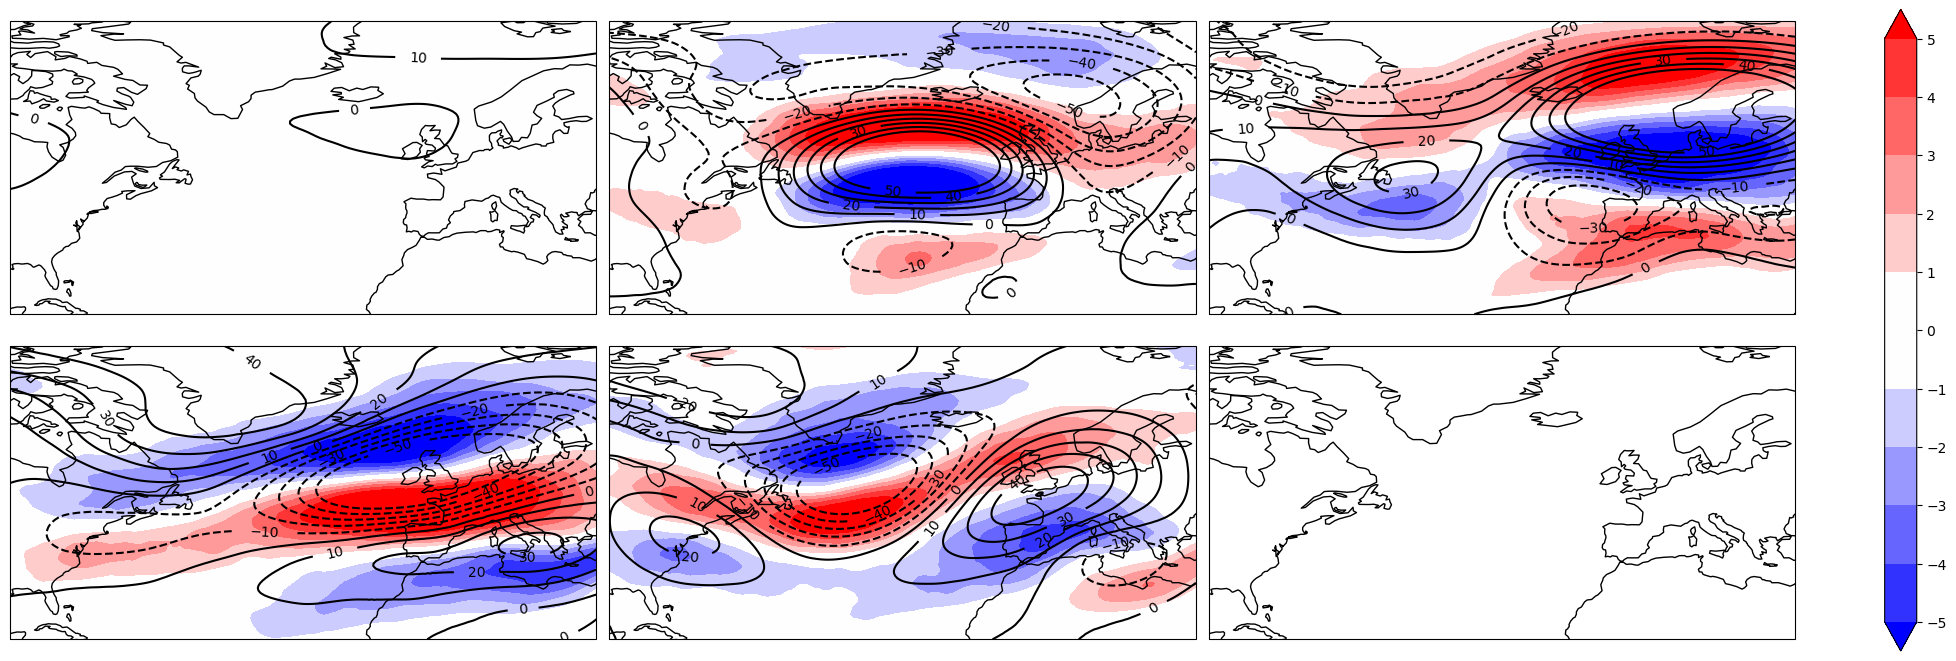

In [16]:
clu = Clusterplot(2, 3, exp_wind.get_region())
clu.add_any_contour_from_mask(da_wind, mask_wind, type='contourf')
clu.add_any_contour_from_mask(da_z, mask_wind, type='contour', clabels=True)

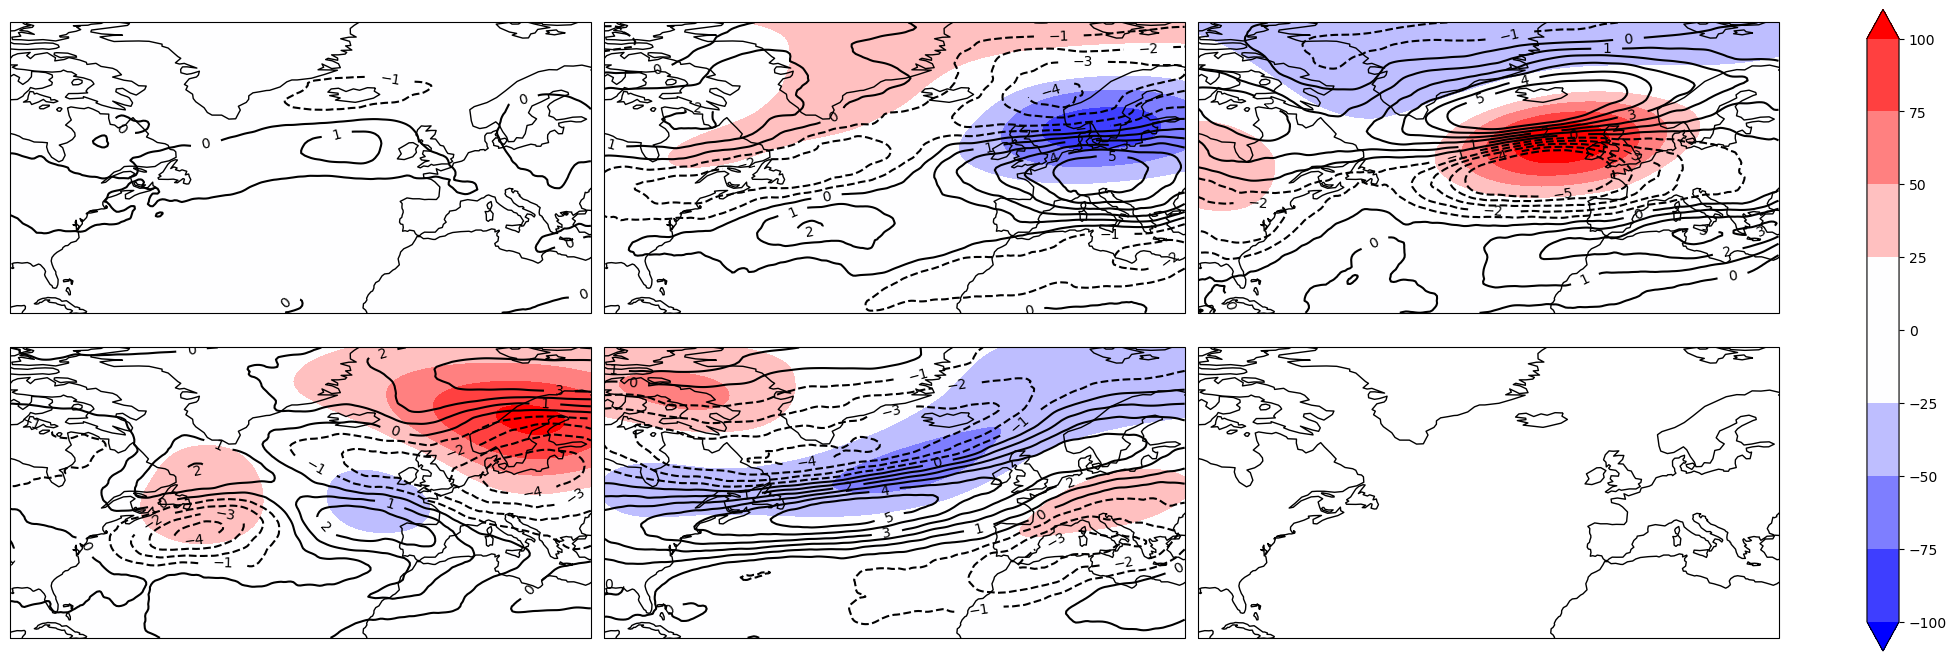

In [21]:
clu = Clusterplot(2, 3, exp_wind.get_region())
clu.add_any_contour_from_mask(da_z, mask_z, type='contourf')
clu.add_any_contour_from_mask(da_wind, mask_z, type='contour', clabels=True)